In [1]:
import pandas as pd
import folium

In [2]:
df_stations = pd.read_csv('data/features/station/stations.csv')

In [3]:
df_stations

id                          name       lat       lon  elevation
0   25134848                      Antonina -25.24341 -48.75248      60.00
1   23515154                     Apucarana -23.51750 -51.53020     746.00
2   24235332           Assis Chateaubriand -24.38860 -53.54110     450.00
3   25354852                BR 277 - KM 41 -25.57940 -48.88110     374.00
4   23005002                       Cambará -23.00250 -50.03620     450.00
5   24035222                  Campo Mourão -24.08543 -52.38654     601.20
6   24385115              Cândido de Abreu -24.63210 -51.24520     645.00
7   24535333                      Cascavel -24.88450 -53.55470     719.30
8   24474959                        Castro -24.78695 -49.99927    1007.76
9   24494915                    Cerro Azul -24.82670 -49.26040     366.00
10  23395232                      Cianorte -23.65220 -52.54760     451.00
11  23385294                 Cidade Gaúcha -23.35916 -52.93191     381.00
12  26445235                   Clevelândia -26.41720 -52.34874     980.00
13  25264913                      Curitiba -25.44869 -49.23060     923.50
14  25264916                      Curitiba -25.44817 -49.23033     935.00
15  22375289             Diamante do Norte -22.63937 -52.89016     362.00
16  25415305                 Dois Vizinhos -25.69906 -53.09527     520.00
17  25335129                    Entre Rios -25.54590 -51.48840    1095.00
18  25654927       Fazenda Gralha Azul-PUC -25.65457 -49.27852     911.73
19  25275035            Fernandes Pinheiro -25.45320 -50.58390     893.00
20  26055139                  Foz do Areia -26.00370 -51.66790     728.20
21  23605449                 Foz do Iguaçu -25.36000 -54.29000     231.00
22  26055305             Francisco Beltrão -26.05930 -53.05080     652.00
23  26445135              General Carneiro -26.39847 -51.35367    1018.00
24  24115301                       Goioerê -24.15846 -53.03059     468.00
25  24045415                        Guaira -24.06670 -54.26130     227.90
26  25215130                    Guarapuava -25.38450 -51.49350    1070.00
27  25324831                     Guaratuba -25.84536 -48.58049       0.00
28  23765018                        Ibaiti -23.77334 -50.18057     930.00
29  23235338                      Icaraíma -23.39038 -53.63593     385.00
..       ...                           ...       ...       ...        ...
36  23185109                      Londrina -23.35950 -51.16470     585.00
37  24325101            Mal.Candido Rondon -24.53330 -54.01925     392.00
38  23245155                       Maringa -23.40536 -51.93283     542.00
39  23275159                       Maringá -23.44830 -51.98810     570.00
40  25424883                      Morretes -25.50894 -48.80868      59.00
41  23245034                   Nova Fátima -23.41528 -50.57774     668.00
42  24265157                    Nova Tebas -24.43735 -51.96302     654.00
43  26285158                        Palmas -26.46820 -51.97620    1100.00
44  24535213                      Palmital -24.86440 -52.21860     783.00
45  24185355                      Palotina -24.31290 -53.90080     303.00
46  25534852                     Paranaguá -25.53780 -48.52960      19.00
47  22505213                   Paranapoema -22.65827 -52.13453     311.00
48  23055226                     Paranavaí -23.09160 -52.44380     480.00
49  26075241                   Pato Branco -26.12290 -52.65140     721.80
50  25254905                       Pinhais -25.39070 -49.12990     930.00
51  25385157                        Pinhão -25.64944 -51.96250     910.00
52  23435346                      Planalto -25.72186 -53.74792     520.00
53  25135001                  Ponta Grossa -25.01370 -50.15240     888.25
54  25564936                         REPAR -25.56270 -49.36360        NaN
55  25174828  Reserva Natural Salto Morato -25.17790 -48.28810      32.00
56  25315329                  Salto Caxias -25.52070 -53.49450     440.00
57  25315301                  Salto Osorio -25.52170 -53.03030     514.00
58  24505420  

In [6]:
map = folium.Map(location=[-24, -51.5], zoom_start=7,
                   tiles='Stamen Terrain')

for index, row in df_stations.iterrows():
    folium.Marker([row.lat, row.lon], popup='%s - %s' % (row['id'], row['name'])).add_to(map)
map.save('stations.html')

In [7]:
map

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap


def make_map():
    fig, ax = plt.subplots(figsize=(20, 10))
    m = Basemap(projection='merc', llcrnrlat=-27, urcrnrlat=-22,
                llcrnrlon=-55, urcrnrlon=-47.5, resolution='i')
    m.ax = ax
    #m.fillcontinents()
    return fig, m

In [87]:
def drawstates(ax, shapefile='data/maps/BRA_adm1'):
        shp = m.readshapefile(shapefile, 'states', drawbounds=True)
        for nshape, seg in enumerate(m.states):
            poly = Polygon(seg, facecolor="None", edgecolor='k')
            ax.add_patch(poly)

In [148]:
selected_stations = {
    25534852:  {'name': 'Paranaguá', 'x_offset': -30000, 'y_offset': -15000},
    25264916:  {'name': 'Curitiba', 'x_offset': -30000, 'y_offset': 10000},
    26145103:  {'name': 'União da Vitória', 'x_offset': -50000, 'y_offset': 15000},
    24385115:  {'name': 'Cândido de Abreu', 'x_offset': -50000, 'y_offset': 15000},
    23185109:  {'name': 'Londrina', 'x_offset': -30000, 'y_offset': 15000},
    23385294:  {'name': 'Cidade Gaúcha', 'x_offset': -50000, 'y_offset': 15000},
    24535333:  {'name': 'Cascavel', 'x_offset': -30000, 'y_offset': 15000}
}

/discolocal/sato/miniconda3/envs/mestrado/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/discolocal/sato/miniconda3/envs/mestrado/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/discolocal/sato/miniconda3/envs/mestrado/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/discolocal/sato/miniconda3/envs/mestrado/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


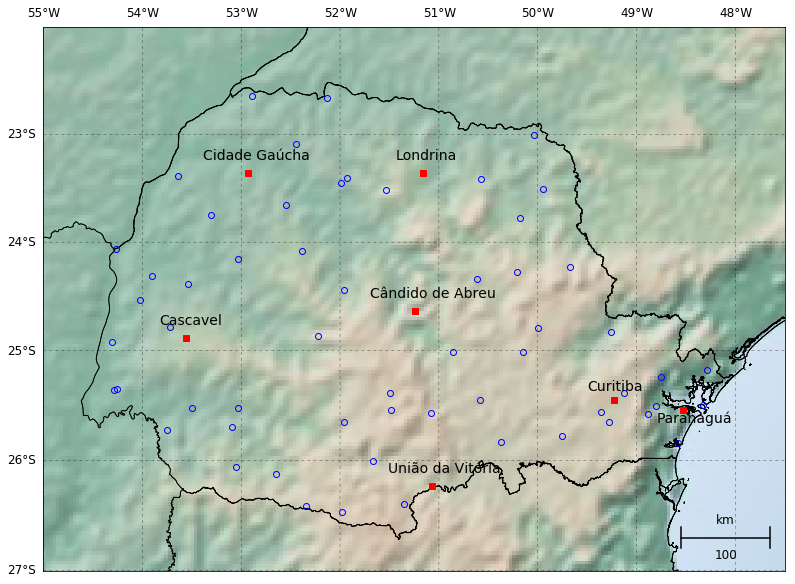

In [149]:
fig, m = make_map()
m.shadedrelief()
drawstates(m.ax)
for index, row in df_stations.iterrows():
    x,y = m(row.lon, row.lat)
    if row.id in selected_stations.keys():
        m.plot(x, y, 's', markersize=6, markerfacecolor='red', markeredgecolor='red', markeredgewidth=1)
        x_offset = selected_stations[row.id]['x_offset']
        y_offset = selected_stations[row.id]['y_offset']
        plt.annotate('%s' % selected_stations[row.id]['name'], (x + x_offset, y + y_offset), fontsize=14)
    else:
        m.plot(x, y, 'o', markersize=6, markerfacecolor="None", markeredgecolor='blue', markeredgewidth=1)
#    m.plot(x, y, '+', markersize=6, markeredgecolor='black')
_ = m.drawmeridians(range(-55, -47), labels=[False,True,True,False], fontsize=12, dashes=[10,10], linewidth=0.3)
_ = m.drawparallels(range(-27, -22), labels=[True,False,False,True], fontsize=12, dashes=[10,10], linewidth=0.3)
_ = m.drawmapscale(-48.1, -26.7, -51, -24, 100, barstyle='simple', units='km', fontsize=12, yoffset=None, labelstyle='simple', fontcolor='k', fillcolor1='w', fillcolor2='k', ax=None, format='%d')
